<a href="https://colab.research.google.com/github/Ardalan-gerami81/HW_ML/blob/main/Support_Vector_Machines_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance.

## Section 1. Importing Necessary Libraries

In [25]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [26]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data
train_data = pd.read_csv('SalaryData_Train.csv')
# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data
test_data = pd.read_csv('SalaryData_Test.csv')
# TODO: Display the first 5 or 10 rows of the train_data dataframe
train_data.iloc[0:5]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Section 3. EDA

In [27]:
# TODO: Print the shape of the train_data dataframe
print('The shape of the train_data :',train_data.shape)
# TODO: Print the shape of the test_data dataframe
print('The shape of the test_data :',test_data.shape)
# TODO: Print the information about the train_data dataframe
display(train_data.info())
# TODO Display the summary statistics of the train_data dataframe
display(train_data.describe())
# TODO: Replace any NaN values in the train_data dataframe with 0
display(train_data.fillna(value = 0,inplace=True))
# TODO: Print the number of NaN values in each column of the train_data dataframe
display(train_data.isna().sum())

The shape of the train_data : (18645, 14)
The shape of the test_data : (15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18645 non-null  int64 
 1   workclass      18645 non-null  object
 2   education      18645 non-null  object
 3   educationno    18645 non-null  int64 
 4   maritalstatus  18645 non-null  object
 5   occupation     18645 non-null  object
 6   relationship   18645 non-null  object
 7   race           18645 non-null  object
 8   sex            18645 non-null  object
 9   capitalgain    18645 non-null  int64 
 10  capitalloss    18645 non-null  int64 
 11  hoursperweek   18645 non-null  int64 
 12  native         18645 non-null  object
 13  Salary         18644 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.0+ MB


None

,age,educationno,capitalgain,capitalloss,hoursperweek
count,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000
mean,38.490695,10.124001,1073.642692,88.679539,40.900885
std,13.179845,2.530582,7374.919691,403.399003,11.906083
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


None

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Data Visualization

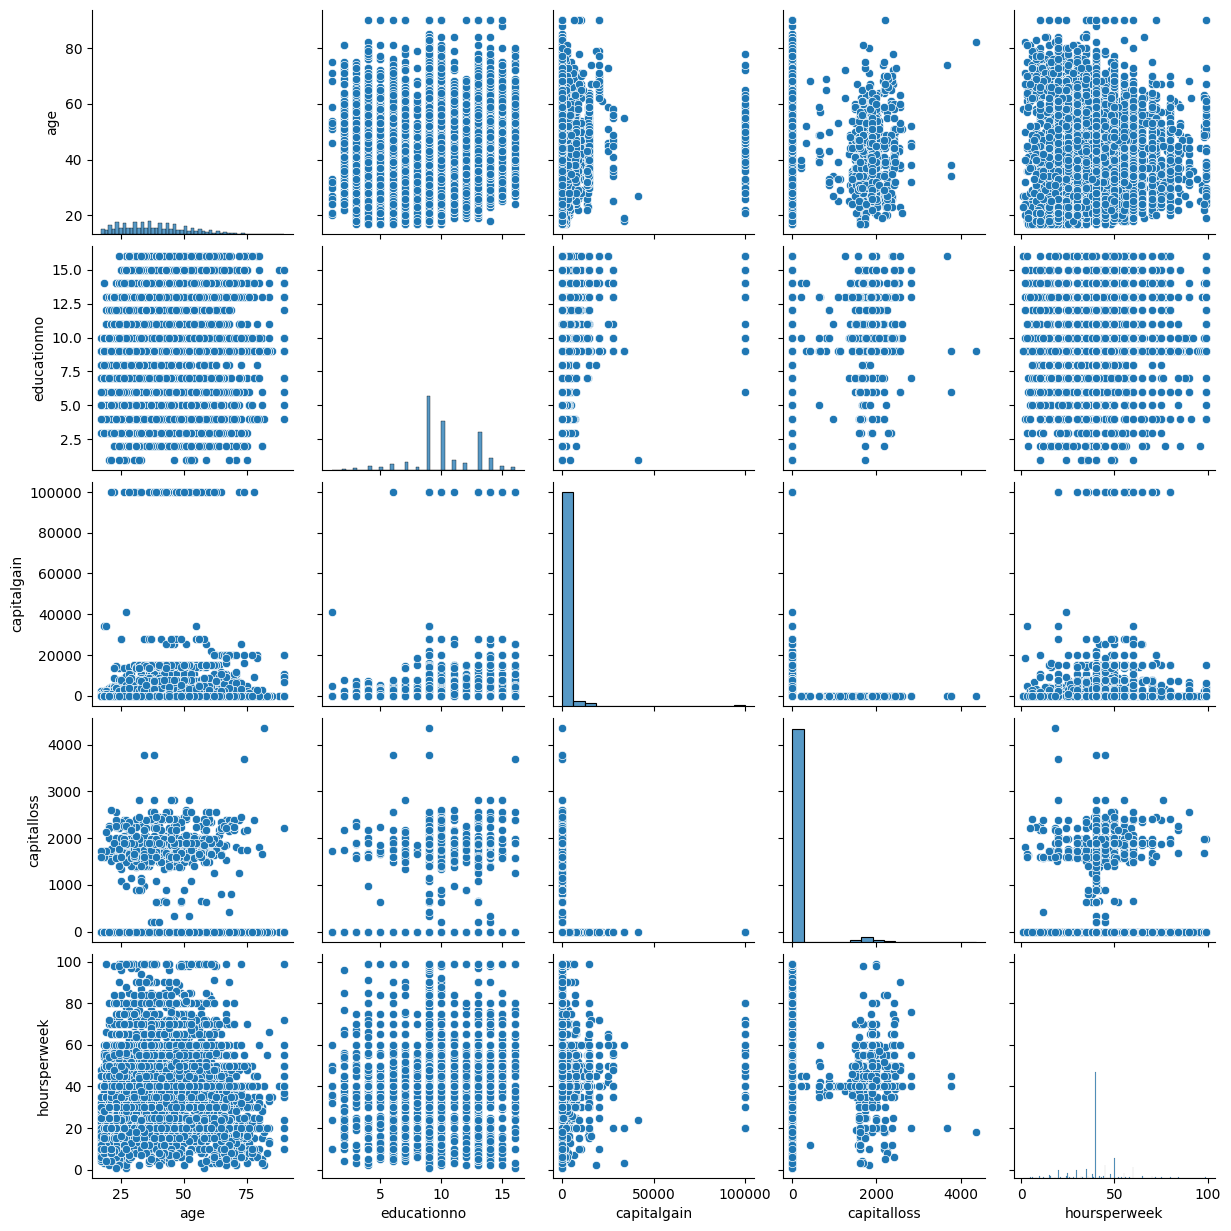

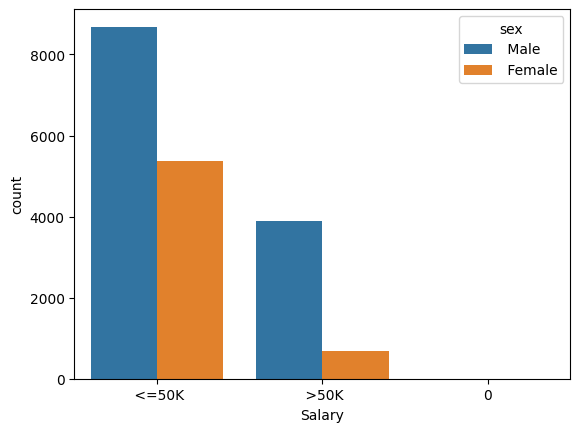

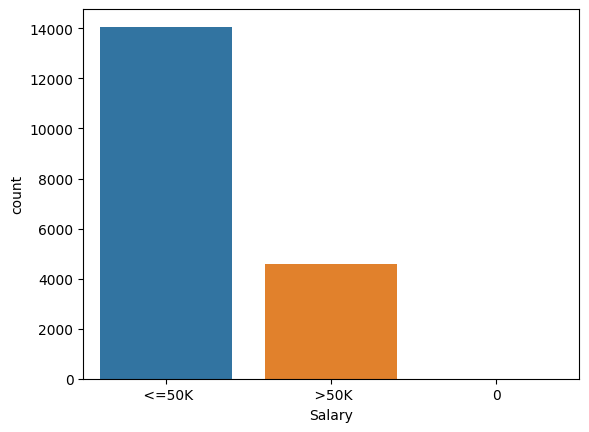

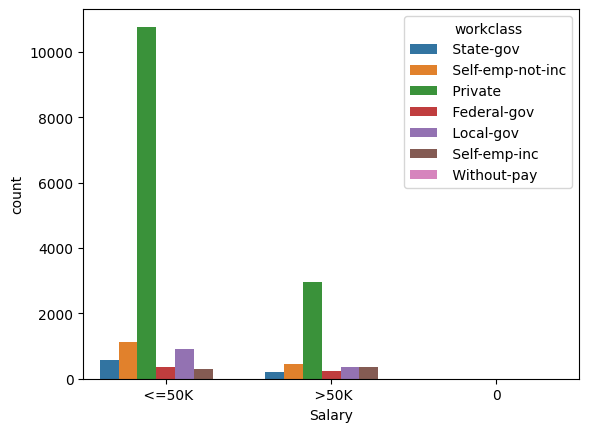

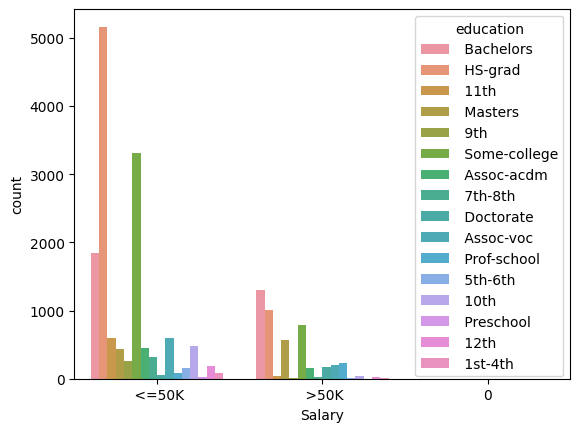

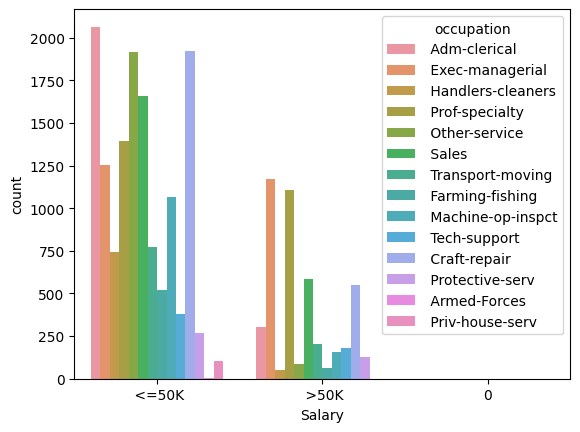

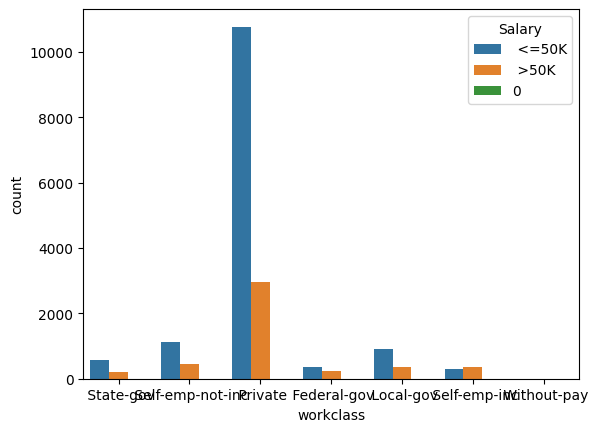

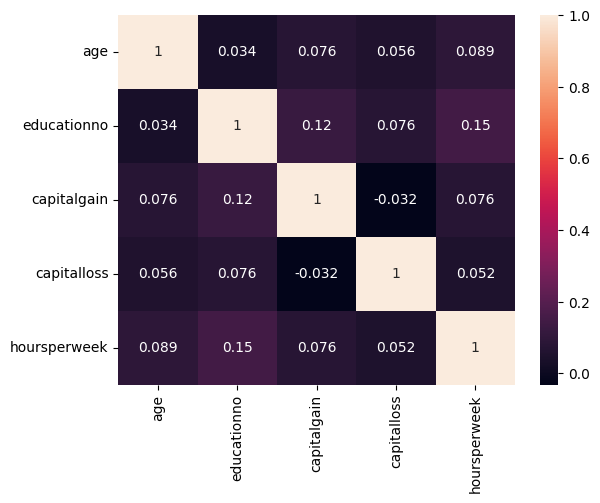

In [28]:
# TODO: Display pairwise relationships between variables in the train_data dataframe
sns.pairplot(train_data)
plt.show()
# TODO: Plot the average count of males and females in each salary group using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'sex')
plt.show()
# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
sns.countplot(data = train_data,x = 'Salary')
plt.show()
# TODO: Plot the count of each salary group in each workclass using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'workclass')
plt.show()
# TODO: Plot the average count of each education level in each salary group using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'education')
plt.show()
# TODO: Plot the average count of each occupation in each salary group using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'occupation')
plt.show()
# TODO: Plot the average count of each workclass in each salary group using a bar plot
sns.countplot(data = train_data,x = 'workclass',hue = 'Salary')
plt.show()
# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap
sns.heatmap(train_data.corr(), annot=True)
plt.show()

###  Outliers Detection

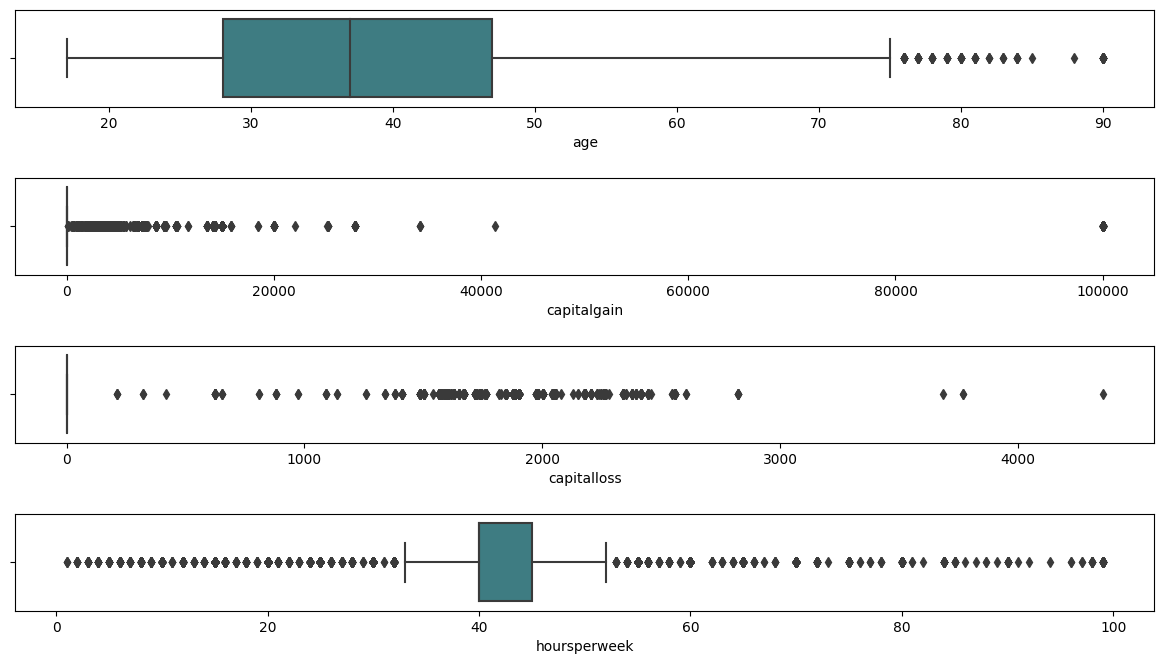

In [29]:
outlier1 = train_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

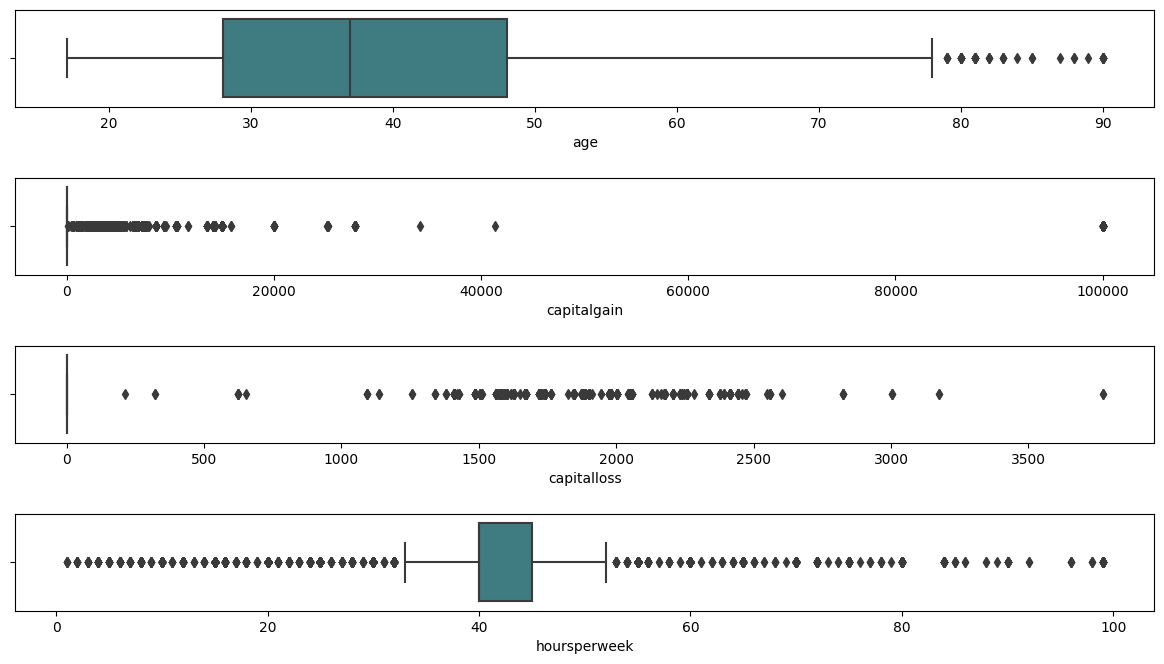

In [30]:
outlier2 = test_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [31]:
# TODO: Create a LabelEncoder object
label_encoder = LabelEncoder()
# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:
# workclass, education, maritalstatus, occupation, relationship, race, sex, native
columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
for feature in columns:
  train_data[feature] = label_encoder.fit_transform(train_data[feature])
# TODO: Display the modified train_data dataframe
display(train_data)
# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
train_data['Salary'] = [0 if x == ' <=50K' else 1 for x in train_data['Salary']]
# TODO: Do the same preprocessing to test data
label_encoder = LabelEncoder()
for feature in columns:
    test_data[feature] = label_encoder.fit_transform(test_data[feature])
display(test_data)
test_data['Salary'] = [0 if x == ' <=50K' else 1 for x in test_data['Salary']]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18640,62,4,11,9,4,7,4,4,0,0,0,6,38,<=50K
18641,44,2,15,10,0,2,1,4,1,0,0,55,38,<=50K
18642,28,1,11,9,2,10,0,4,1,3908,0,40,38,<=50K
18643,68,1,12,14,6,9,4,2,0,0,0,40,38,>50K


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


## Section 5. Model Building

In [32]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = train_data.drop('Salary',axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data['Salary']
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop('Salary',axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']
# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print('The shape of X_train :',X_train.shape)
print('The shape of y_train :',y_train.shape)
print('The shape of X_test :',X_test.shape)
print('The shape of y_test :',y_test.shape)
# TODO: Create a Support Vector Classifier object
clf = SVC()

The shape of X_train : (18645, 13)
The shape of y_train : (18645,)
The shape of X_test : (15060, 13)
The shape of y_test : (15060,)


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [33]:
# TODO: Train the svc model with X_train and y_train
clf.fit(X_train,y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = clf.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
print('confusion matrix :',confusion_matrix(y_test,y_pred))
# TODO: Print the classification report of y_test and y_pred
print('classification report :')
print(classification_report(y_test,y_pred))
# TODO: Print the training accuracy of the svc model with X_train and y_train
print('training accuracy :',clf.score(X_train,y_train))
# TODO: Print the testing accuracy of the svc model with X_test and y_test
print('testing accuracy :',clf.score(X_test,y_test))

confusion matrix : [[10997   363]
 [ 2703   997]]
classification report :
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

training accuracy : 0.7980155537677661
testing accuracy : 0.7964143426294821


##Section 7. Handling Imbalance Data

In [34]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
print('count of each unique value in the Salary column of the train_data dataframe :')
print(train_data['Salary'].value_counts())
# TODO: Create a SMOTE object
smote = SMOTE()
# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# TODO: Display the resampled X_resampled dataframe
display(X_resampled)
# TODO: Display the resampled y_resampled dataframe
display(y_resampled)
# TODO: Print the count of each unique value in the resampled y_resampled dataframe
print('count of each unique value in the resampled y_resampled dataframe :')
print(y_resampled.value_counts())

count of each unique value in the Salary column of the train_data dataframe :
0    14066
1     4579
Name: Salary, dtype: int64


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,9,13,2,3,0,4,1,0,0,13,38
2,38,2,11,9,0,5,1,4,1,0,0,40,38
3,53,2,1,7,2,5,0,2,1,0,0,40,38
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28127,43,2,14,15,2,9,0,4,1,99999,0,63,38
28128,43,2,11,9,2,2,0,4,1,0,0,41,38
28129,42,1,15,10,1,13,0,4,1,0,0,61,38
28130,55,3,10,16,2,9,0,4,1,99999,0,69,38


0        0
1        0
2        0
3        0
4        0
        ..
28127    1
28128    1
28129    1
28130    1
28131    1
Name: Salary, Length: 28132, dtype: int64

count of each unique value in the resampled y_resampled dataframe :
0    14066
1    14066
Name: Salary, dtype: int64


* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [35]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
clf = SVC(gamma=0.01, C=10)
# TODO: Train the model with resampled X and y dataframes as arguments
clf.fit(X_resampled,y_resampled)
# TODO: Use the model to predict the values of y for X_test and store the result in y_pred
y_pred = clf.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
print('confusion matrix :')
print(confusion_matrix(y_test,y_pred))
# TODO: Print the classification report of y_test and y_pred
print('classification report:')
print(classification_report(y_test,y_pred))
# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments
print('training accuracy:')
print(clf.score(X_resampled,y_resampled))
# TODO: Print the testing accuracy of the model with X_test and y_test as arguments
print('testing accuracy:')
print(clf.score(X_test,y_test))

confusion matrix :
[[9402 1958]
 [ 825 2875]]
classification report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     11360
           1       0.59      0.78      0.67      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.80      0.77     15060
weighted avg       0.84      0.82      0.82     15060

training accuracy:
0.8965235319209441
testing accuracy:
0.8152058432934927


## Section 8. Feature Selection

In [36]:
def select_features(X_train, y_train, X_test):
    # TODO: Create a SelectKBest object with chi2 as the score function
    select_best = SelectKBest(chi2)
    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object
    select_best.fit(X_train, y_train)
    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs = select_best.transform(X_train)
    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs = select_best.transform(X_test)
    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs, select_best

feature_score 0 : 4616.326874524323
feature_score 1 : 3.1779041801702763
feature_score 2 : 121.84765639759075
feature_score 3 : 1272.1740776053307
feature_score 4 : 581.966726404492
feature_score 5 : 150.1449044408553
feature_score 6 : 2071.747078247881
feature_score 7 : 20.496862368452625
feature_score 8 : 278.8734821174381
feature_score 9 : 45516705.15375754
feature_score 10 : 787350.9102496649
feature_score 11 : 3175.529211126631
feature_score 12 : 12.962092631401934


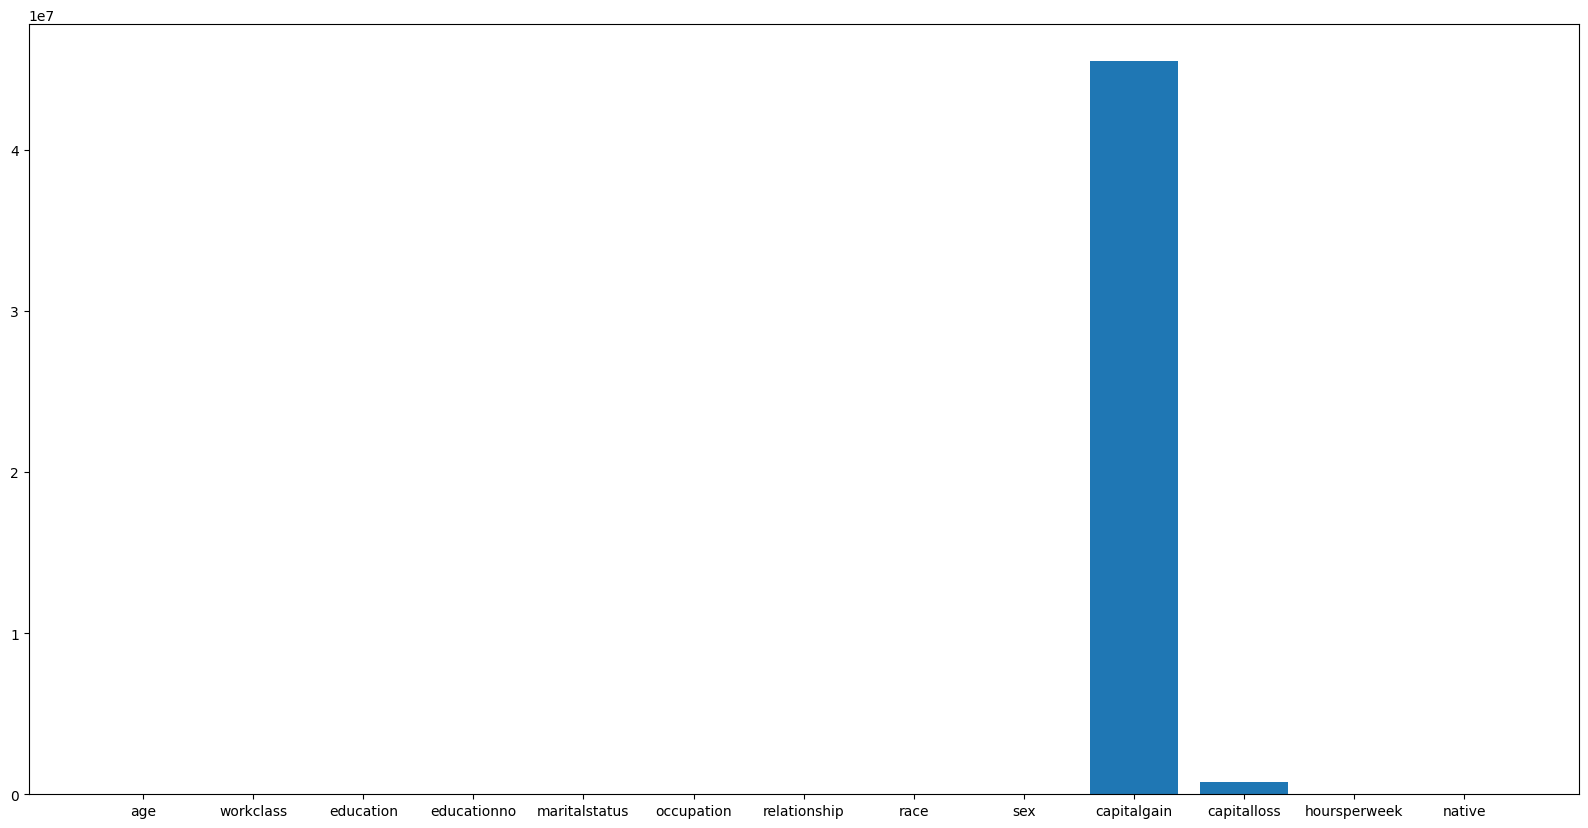

most relevant features: [ 0  2  3  4  5  6  8  9 10 11]


In [39]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# TODO: print the corresponding score of each feature using scores_ attribute of the fs object
for i in range(len(fs.scores_)):
  print('feature_score',i,':',fs.scores_[i])
# TODO: Create a bar plot of the scores
features = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native']
plt.figure(figsize=(20,10))
plt.bar(features,fs.scores_)
# TODO: Display the bar plot
plt.show()
# TODO Pick out the most relevant features
print('most relevant features:',fs.get_support(indices=True))

In [40]:
# TODO: Create a copy of the train_data dataframe called train_data_copy
train_data_copy = train_data.copy()
# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe
train_data_copy = train_data_copy.drop(['workclass','race','native'],axis=1)
# TODO: Display the train_data_copy dataframe
display(train_data_copy)
# TODO: Do the same to the test_data
test_data_copy = test_data.copy()
test_data_copy = test_data_copy.drop(['workclass','race','native'],axis=1)
display(test_data_copy)

,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,9,13,4,0,1,1,2174,0,40,0
1,50,9,13,2,3,0,1,0,0,13,0
2,38,11,9,0,5,1,1,0,0,40,0
3,53,1,7,2,5,0,1,0,0,40,0
4,28,9,13,2,9,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
18640,62,11,9,4,7,4,0,0,0,6,0
18641,44,15,10,0,2,1,1,0,0,55,0
18642,28,11,9,2,10,0,1,3908,0,40,0
18643,68,12,14,6,9,4,0,0,0,40,1


,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,1,7,4,6,3,1,0,0,40,0
1,38,11,9,2,4,0,1,0,0,50,0
2,28,7,12,2,10,0,1,0,0,40,1
3,44,15,10,2,6,0,1,7688,0,40,1
4,34,0,6,4,7,1,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...
15055,33,9,13,4,9,3,1,0,0,40,0
15056,39,9,13,0,9,1,0,0,0,36,0
15057,38,9,13,2,9,0,1,0,0,50,0
15058,44,9,13,0,0,3,1,5455,0,40,0


## Section 9. Model Training with Highly Relevant Features


In [42]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed

# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train_data_copy = train_data_copy.drop('Salary',axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train_data_copy = train_data_copy['Salary']
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test_data_copy = test_data_copy.drop('Salary',axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test_data_copy = test_data_copy['Salary']
# TODO: Create a Support Vector Classifier object
clf = SVC()

# TODO: Train the svc model with X_train and y_train
clf.fit(X_train_data_copy,y_train_data_copy)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = clf.predict(X_test_data_copy)
# TODO: Print the confusion matrix of y_test and y_pred
print('confusion matrix:')
print(confusion_matrix(y_test_data_copy,y_pred))
# TODO: Print the classification report of y_test and y_pred
print('classification report:')
print(classification_report(y_test_data_copy,y_pred))
# TODO: Print the training accuracy of the svc model with X_train and y_train
print('training accuracy:')
print(clf.score(X_train_data_copy,y_train_data_copy))
# TODO: Print the testing accuracy of the svc model with X_test and y_test
print('testing accuracy:')
print(clf.score(X_test_data_copy,y_test_data_copy))

confusion matrix:
[[10997   363]
 [ 2703   997]]
classification report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

training accuracy:
0.7980155537677661
testing accuracy:
0.7964143426294821
